In [1]:
# 데이터 처리
import pandas as pd

# 행렬 연산
import numpy as np

# 데이터 시각화
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# 선형 회귀분석모델 formula
import statsmodels.formula.api as smf

#잔차의 정규성 확인
from statsmodels.api import qqplot, add_constant

# 학습용, 평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split

# 선형회귀분석
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

#평가함수 
from sklearn.metrics import r2_score


#회귀분석의 정규성 확인
from statsmodels.api import qqplot

from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from statsmodels.stats.anova import anova_lm
# import scipy.stats as stats
# from statsmodels.stats.proportion import proportions_ztest

In [2]:
matplotlib.__file__

'/home/piai/anaconda3/lib/python3.10/site-packages/matplotlib/__init__.py'

In [3]:
plt.rcParams["font.family"] = 'NanumGothicCoding'

In [4]:
# 맑은 고딕 적용
#matplotlib.rc("font", family = 'Malgun Gothic')

# 음수 표시
matplotlib.rc("axes", unicode_minus = False)

#### 1. 데이터 구성하기

In [5]:
df_raw = pd.read_csv("/home/piai/문서/2. Big Data 분석/체질검사.csv" ,encoding = 'euc-kr')

In [6]:
# 1개의 목표변수, 14개의 설명변수
df_raw.shape

(252, 15)

In [7]:
# 결측치 확인
df_raw.isnull().sum()

FAT        0
AGE        0
WEIGHT     0
HEIGHT     0
NECK       0
CHEST      0
ABDOMEN    0
HIP        0
THIGH      0
KNEE       0
ANKLE      0
BICEPS     0
FOREARM    0
WRIST      0
GENDER     0
dtype: int64

In [8]:
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [9]:
# 단위와 표현되어 있는 수치형 변수 처리
df_raw[['WEIGHT','WEIGHT_UNIT']] = df_raw["WEIGHT"].str.split(expand=True)
df_raw[['HEIGHT','HEIGHT_UNIT']] = df_raw["HEIGHT"].str.split(expand=True)
df_raw["WEIGHT"] = df_raw["WEIGHT"].astype('float64') * 0.14
df_raw["HEIGHT"] = df_raw["HEIGHT"].astype('float64') *2.54

df_raw = df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'],axis= 1)

df_raw = pd.get_dummies(df_raw, drop_first = True)
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,50.841,183.515,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,23.520,180.975,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,24.885,173.990,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,20.685,167.005,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,30.660,162.560,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


In [10]:
#BMI 계산을 위한 파생변수 생성
df_raw["BMI"] = (df_raw["WEIGHT"] / ((df_raw["HEIGHT"]/100) ** 2)).round(1)

# BMI계산을 하기 위해서 weight와 height를 사용했으므로 weight와 height는 삭제한다
df_raw.drop(['WEIGHT','HEIGHT'],axis = 1, inplace = True)
df_raw.head()

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성,BMI
0,35.2,46,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0,15.1
1,11.8,27,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0,7.2
2,22.2,69,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0,8.2
3,10.6,57,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1,7.4
4,47.5,51,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1,11.6


* 변수 간의 경향성 파악 - 그래프 분석

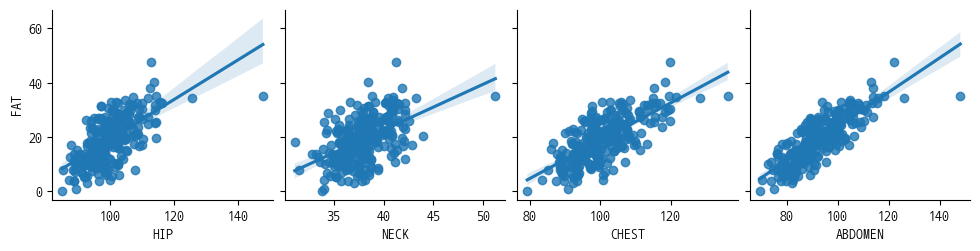

In [11]:
sns.pairplot(df_raw, y_vars="FAT",x_vars=["HIP","NECK","CHEST","ABDOMEN"],kind="reg")

목표변수(FAT)와 다수 설명변수 간의 설명변수 확인 => 적절한 설명변수 선택 필요

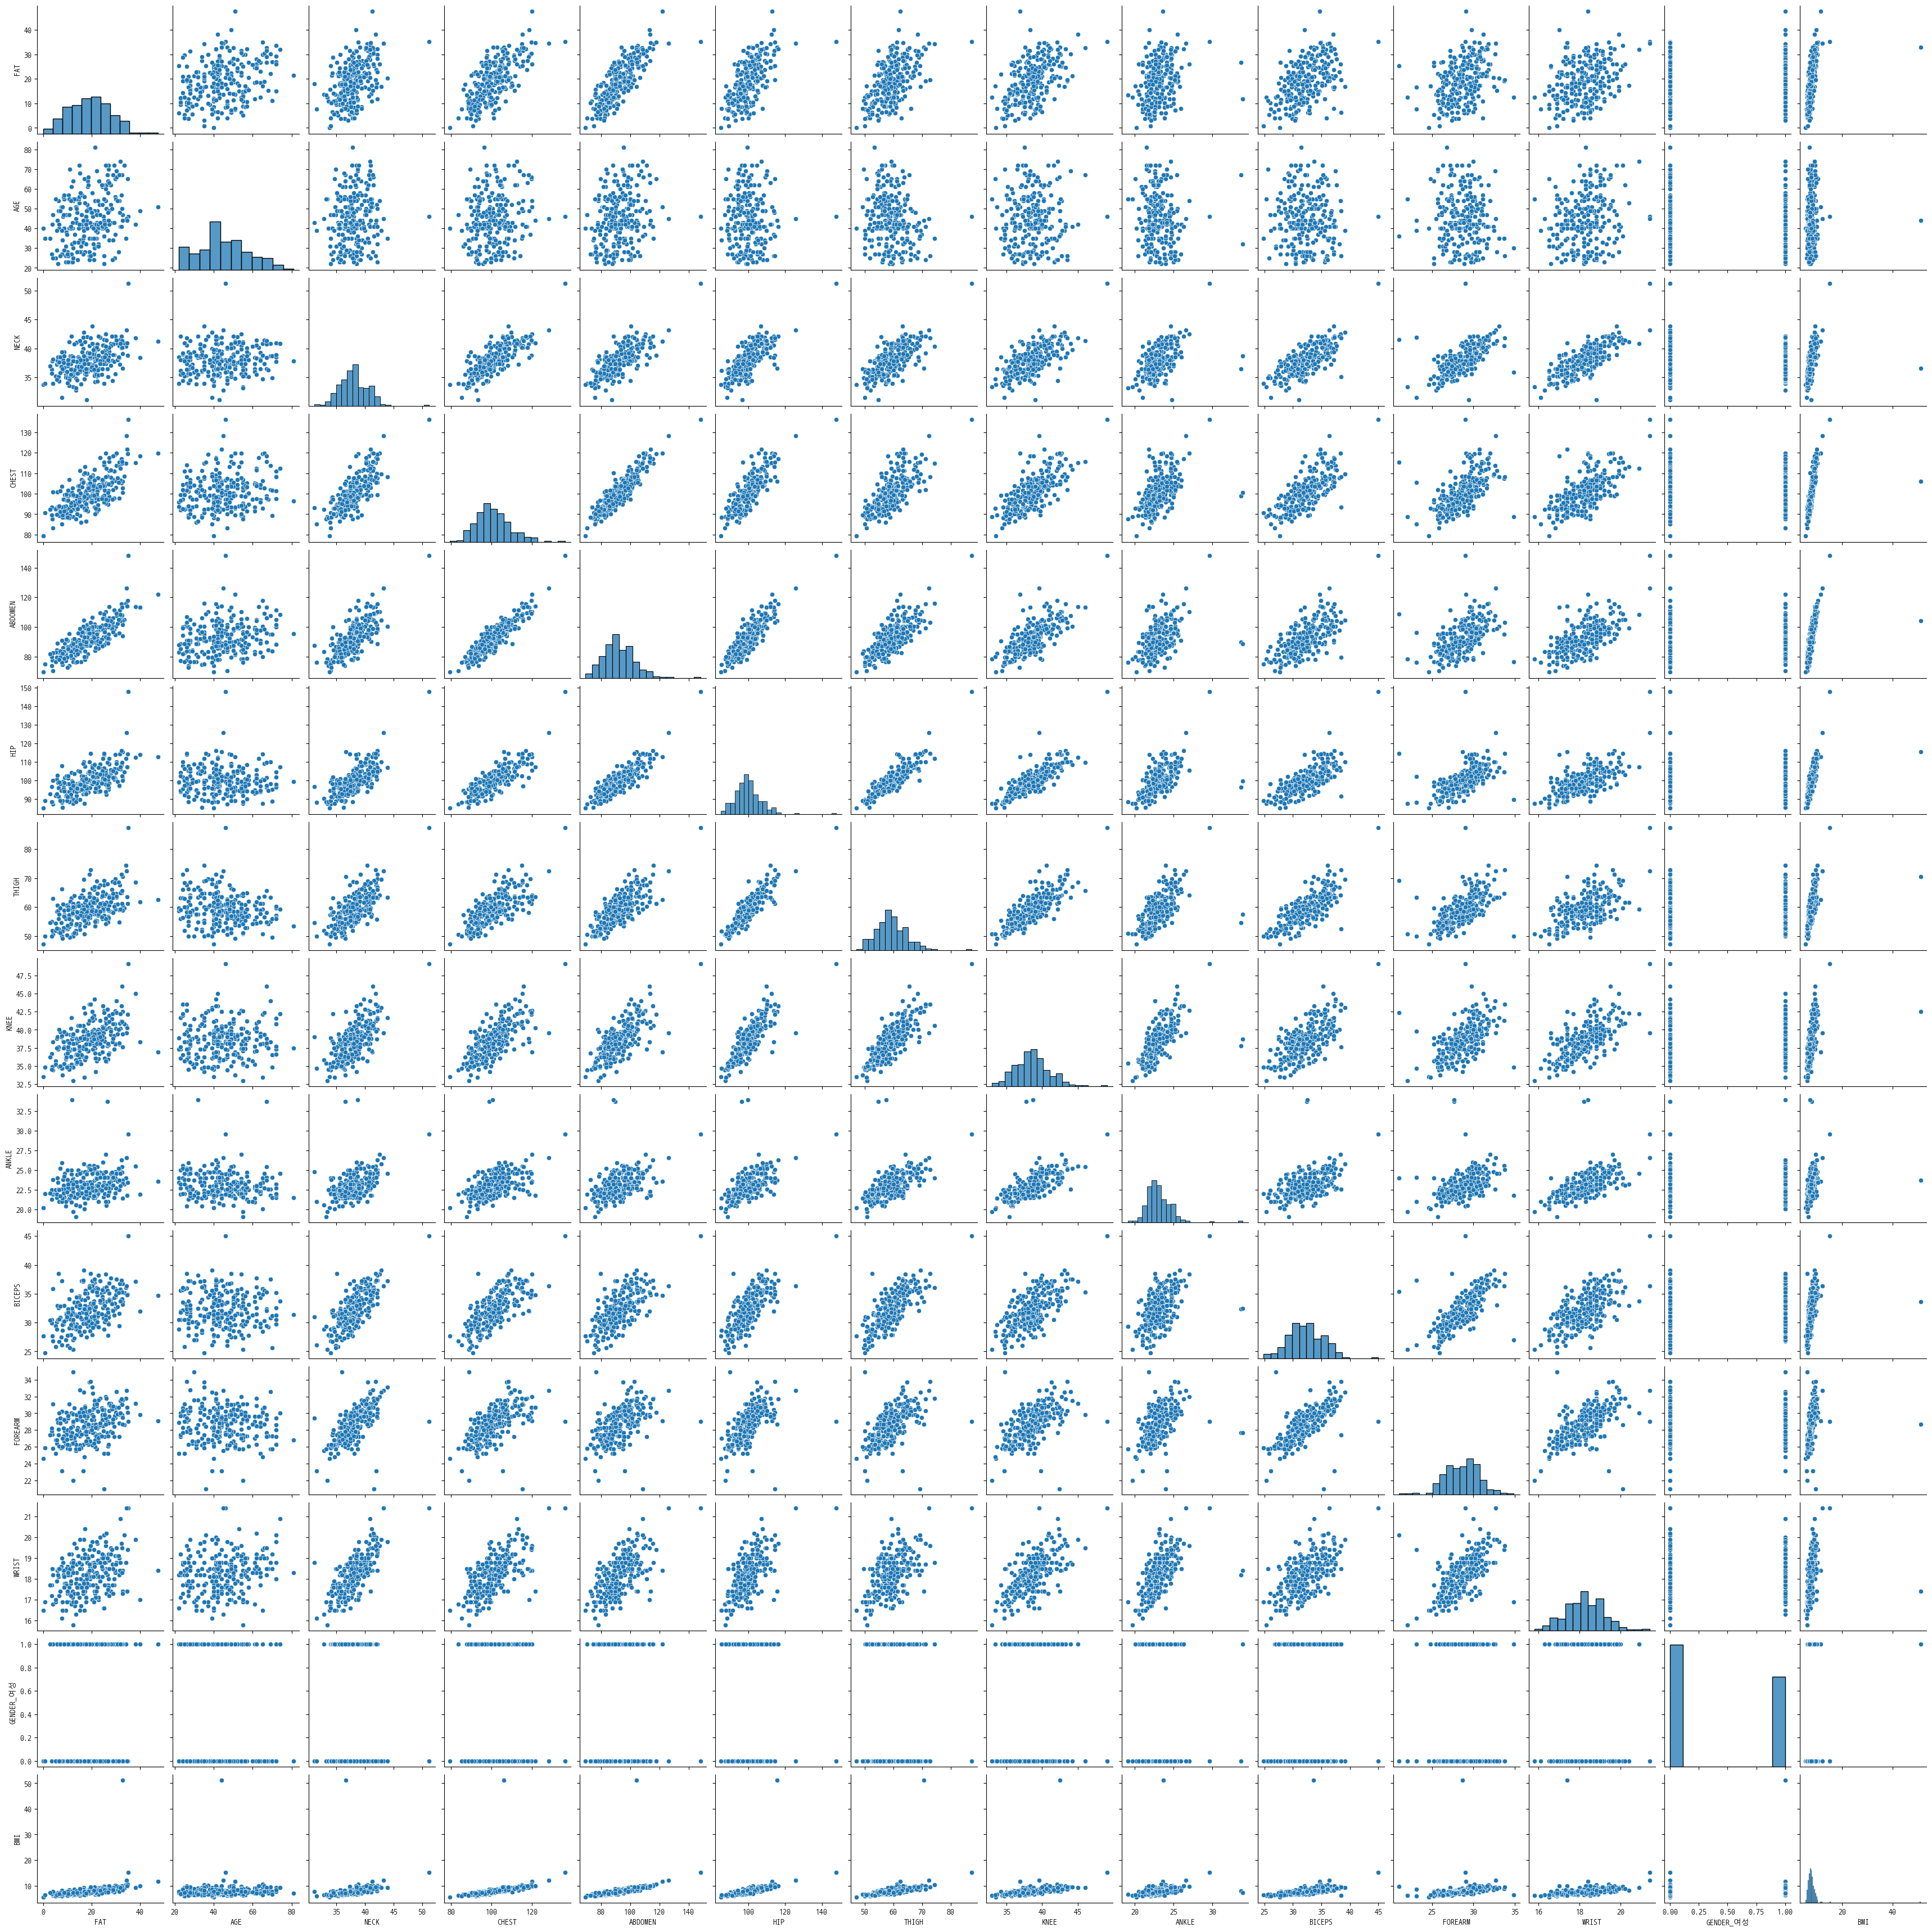

In [12]:
# 산점도 행렬
sns.pairplot(df_raw)
plt.show(sns)

In [13]:
df_raw.corr().round(2)

,FAT,AGE,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성,BMI
FAT,1.00,0.29,0.49,0.70,0.81,0.63,0.56,0.51,0.27,0.49,0.36,0.35,-0.03,0.37
AGE,0.29,1.00,0.11,0.18,0.23,-0.05,-0.20,0.02,-0.11,-0.04,-0.09,0.21,-0.06,0.04
NECK,0.49,0.11,1.00,0.78,0.75,0.73,0.70,0.67,0.48,0.73,0.62,0.74,0.01,0.27
CHEST,0.70,0.18,0.78,1.00,0.92,0.83,0.73,0.72,0.48,0.73,0.58,0.66,-0.01,0.38
ABDOMEN,0.81,0.23,0.75,0.92,1.00,0.87,0.77,0.74,0.45,0.68,0.50,0.62,-0.02,0.41
HIP,0.63,-0.05,0.73,0.83,0.87,1.00,0.90,0.82,0.56,0.74,0.55,0.63,-0.04,0.46
THIGH,0.56,-0.20,0.70,0.73,0.77,0.90,1.00,0.80,0.54,0.76,0.57,0.56,-0.04,0.43
KNEE,0.51,0.02,0.67,0.72,0.74,0.82,0.80,1.00,0.61,0.68,0.56,0.66,-0.03,0.36
ANKLE,0.27,-0.11,0.48,0.48,0.45,0.56,0.54,0.61,1.00,0.48,0.42,0.57,-0.01,0.21
BICEPS,0.49,-0.04,0.73,0.73,0.68,0.74,0.76,0.68,0.48,1.00,0.68,0.63,0.04,0.31


목표변수 체질 비만도(FAT)와 가슴둘레(ABDOMEN) 간의 높은 선형관계 확인
설명변수 상관관계 :  다수 설명변수 간의 선형관계 확인 -> 다중공선성 확인 및 처리 필요

#### 3. 회귀모델 생성

In [14]:
# train, test data 분리
df_train, df_test = train_test_split(df_raw, test_size = 0.4, random_state = 1234)
print("train data size: {}".format(df_train.shape))
print("test data size: {}".format(df_test.shape))

train data size: (151, 14)
test data size: (101, 14)


In [15]:
#선형 회귀 분석 이용, 상소항 자동추기
reg_model = smf.ols(formula='FAT ~ AGE + NECK + CHEST + ABDOMEN + HIP + \
                                    THIGH + KNEE + ANKLE + BICEPS +\
                                FOREARM + WRIST + GENDER_여성 + BMI', data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     32.95
Date:                Mon, 15 May 2023   Prob (F-statistic):           8.47e-36
Time:                        17:11:50   Log-Likelihood:                -427.34
No. Observations:                 151   AIC:                             882.7
Df Residuals:                     137   BIC:                             924.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.1905      8.801     -0.590      0.5

1. No. observations :151 / Df Residuals(잔차 자유도) :137 / Df Model(모델 자유도) : 13

2. 분산분석결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다

3. 설명력 : Adj. R-squred값이 0.75로 이 모델로 y의 75%정도 설명할 수 있다.

4. 회귀계수 검정 : age,neck,abdomen,hip,forearm 의 p값이 유의수준보다 작으므로 유의하다

In [16]:
# 설명변수간의 다중공산성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('FAT', axis = 1)

# statsmodels 의 상수항 추가 함수 적용
df_train_x_const = sm.add_constant(df_train_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values,i)
                for i in range(df_train_x_const.shape[1])]

# vif 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
12,GENDER_여성,1.06
13,BMI,1.39
10,FOREARM,1.91
8,ANKLE,2.03
1,AGE,2.27
9,BICEPS,3.21
11,WRIST,3.37
2,NECK,3.87
7,KNEE,4.01
6,THIGH,8.84


VIF란, Variance Inflation Factor의 약자로서, 분산 팽창 인수라고 한다. 

이 값은 다중회귀분석에서 독립변수가 다중 공산성(Multicollnearity)의 문제를 갖고 있는지 판단하는 기준이며, 

주로 10보다 크면 그 독립변수는 다중공산성이 있다고 말한다

ABDOMEN이 13.0으로 다중공선성이 의심되나, 목표변수에 가장 영향이 큰 변수이므로 제거하지 않음(다중공선성 일부해결)

#### 선형 회귀 분석 : 모델에서 BICEPS제거

In [17]:

reg_model = smf.ols(formula='FAT ~ AGE + NECK + CHEST + ABDOMEN + HIP + \
                                    THIGH + KNEE + ANKLE +\
                                FOREARM + WRIST + GENDER_여성 + BMI', data=df_train)


# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     35.94
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.40e-36
Time:                        17:14:47   Log-Likelihood:                -427.35
No. Observations:                 151   AIC:                             880.7
Df Residuals:                     138   BIC:                             919.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5243      8.564     -0.645      0.5

1. No. observations :151 / Df Residuals(잔차 자유도) :138 / Df Model(모델 자유도) : 12

2. 분산분석결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의하다

3. 설명력 : Adj. R-squred값이 0.73로 이 모델로 y의 73%정도 설명할 수 있다.

4. 회귀계수 검정 : age,neck,abdomen,hip,forearm 의 p값이 유의수준보다 작으므로 유의하다

#### 설명변수간의 다중공산성 재확인 : 설명변수 데이터 생성 및 상수항 추가

In [18]:
# 설명변수간의 다중공산성 재확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop(['FAT','BICEPS'], axis = 1)

# statsmodels 의 상수항 추가 함수 적용
df_train_x_const = sm.add_constant(df_train_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values,i)
                for i in range(df_train_x_const.shape[1])]

# vif 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
11,GENDER_여성,1.06
12,BMI,1.39
9,FOREARM,1.78
8,ANKLE,2.03
1,AGE,2.23
10,WRIST,3.34
2,NECK,3.83
7,KNEE,3.99
6,THIGH,7.86
3,CHEST,8.91


위와 거의 동일한다 모든 값이 13이하이므로 다중공선성 문제는 해결했다고 할 수 있겠다.

#### 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 ANKLE 제거

In [20]:
reg_model = smf.ols(formula='FAT ~ AGE + NECK + CHEST + ABDOMEN + HIP + \
                                    THIGH + KNEE + FOREARM + \
                                    WRIST + GENDER_여성 + BMI', data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     39.39
Date:                Mon, 15 May 2023   Prob (F-statistic):           2.48e-37
Time:                        17:20:01   Log-Likelihood:                -427.50
No. Observations:                 151   AIC:                             879.0
Df Residuals:                     139   BIC:                             915.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.6813      8.537     -0.666      0.5

#### 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 CHEST 제거

In [21]:
reg_model = smf.ols(formula='FAT ~ AGE + NECK + ABDOMEN + HIP + \
                                    THIGH + KNEE + FOREARM + \
                                    WRIST + GENDER_여성 + BMI', data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     43.51
Date:                Mon, 15 May 2023   Prob (F-statistic):           4.30e-38
Time:                        17:20:22   Log-Likelihood:                -427.68
No. Observations:                 151   AIC:                             877.4
Df Residuals:                     140   BIC:                             910.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8933      8.408     -0.582      0.5

#### 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 KNEE제거

In [22]:
reg_model = smf.ols(formula='FAT ~ AGE + NECK + ABDOMEN + HIP + \
                                    THIGH + FOREARM + \
                                    WRIST + GENDER_여성 + BMI', data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     47.96
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.31e-38
Time:                        17:21:12   Log-Likelihood:                -428.54
No. Observations:                 151   AIC:                             877.1
Df Residuals:                     141   BIC:                             907.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.5367      8.161     -0.924      0.3

#### 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 THIGH제거

In [23]:
reg_model = smf.ols(formula='FAT ~ AGE + NECK + ABDOMEN + HIP + \
                                     FOREARM + WRIST + GENDER_여성 + BMI', data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     53.54
Date:                Mon, 15 May 2023   Prob (F-statistic):           3.72e-39
Time:                        17:21:52   Log-Likelihood:                -429.38
No. Observations:                 151   AIC:                             876.8
Df Residuals:                     142   BIC:                             903.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -7.8516      8.173     -0.961      0.3

#### 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 AGE제거

In [25]:
reg_model = smf.ols(formula='FAT ~ NECK + ABDOMEN + HIP + \
                                     FOREARM + WRIST + GENDER_여성 + BMI', data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     59.99
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.90e-39
Time:                        17:22:53   Log-Likelihood:                -430.90
No. Observations:                 151   AIC:                             877.8
Df Residuals:                     143   BIC:                             901.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.6426      7.627     -0.346      0.7

#### 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 WRIST제거

In [26]:
reg_model = smf.ols(formula='FAT ~ NECK + ABDOMEN + HIP + \
                                     FOREARM + GENDER_여성 + BMI', data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     68.52
Date:                Mon, 15 May 2023   Prob (F-statistic):           9.54e-40
Time:                        17:24:02   Log-Likelihood:                -432.47
No. Observations:                 151   AIC:                             878.9
Df Residuals:                     144   BIC:                             900.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5010      6.887     -1.234      0.2

#### 선형 회귀 분석 : 모델에서 pvalue가 가장 큰 GENDER 제거

In [27]:
reg_model = smf.ols(formula='FAT ~ NECK + ABDOMEN + HIP + \
                                     FOREARM + BMI', data=df_train)

# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     82.72
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.05e-40
Time:                        17:25:15   Log-Likelihood:                -432.53
No. Observations:                 151   AIC:                             877.1
Df Residuals:                     145   BIC:                             895.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.3682      6.853     -1.221      0.2

최종적으로 5개 선택

In [28]:
# 설명변수간의 다중공산성 재확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop(['NECK','ABDOMEN','HIP','FOREARM','BMI'], axis = 1)

# statsmodels 의 상수항 추가 함수 적용
df_train_x_const = sm.add_constant(df_train_x)

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values,i)
                for i in range(df_train_x_const.shape[1])]

# vif 정렬
df_vif.sort_values("VIF", ascending=True).round(2)

,variable,VIF
9,GENDER_여성,1.02
6,ANKLE,1.93
2,AGE,1.97
8,WRIST,2.72
1,FAT,2.83
7,BICEPS,2.84
5,KNEE,3.88
3,CHEST,4.57
4,THIGH,5.55
0,const,475.48


모든 변수의 vif가 10보다 작아졌다 => 다중공산성 해결

> 잔차의 가정 확인

- 등분산성 검정

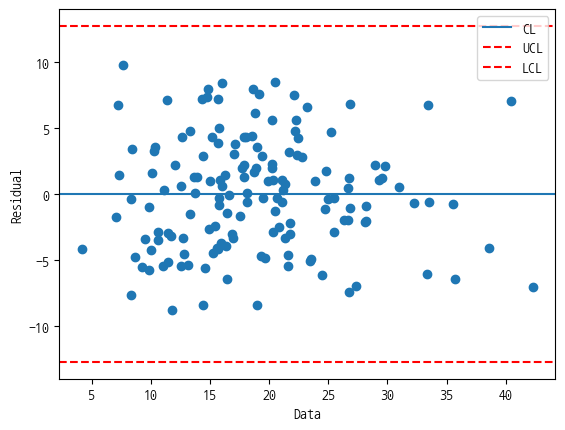

In [29]:
#잔차 산점도: X  - 예측값, Y - 잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y=0, linestyle='-', label='CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle='--', color = 'red', label='UCL')
plt.axhline(y=-3*np.std(reg_result.resid), linestyle='dashed', color = 'red', label='LCL')
plt.legend()
plt.show()

잔차가 0을 기준으로 random하게 산포되어 있으므로 등분산성을 만족한다.

- 정규성 검정

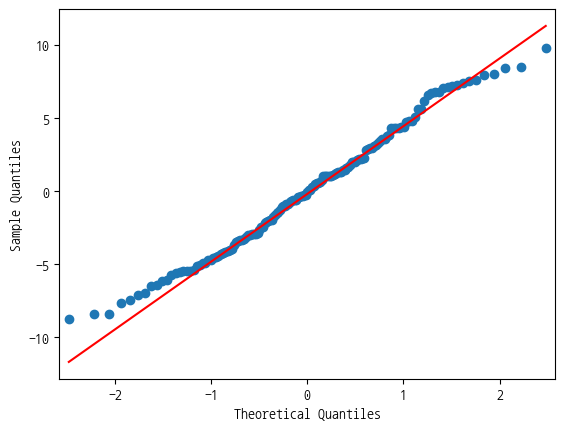

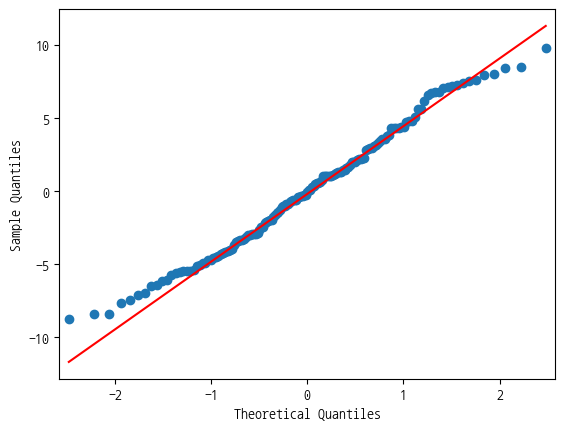

In [30]:
# 잔차 정규성 검정 qqplot, s-standardized line,
qqplot(reg_result.resid, line='q')

정규분포 직선(적색 선)을 중심으로 분포하므로 정규분포를 따른다. 

- 독립성 검정

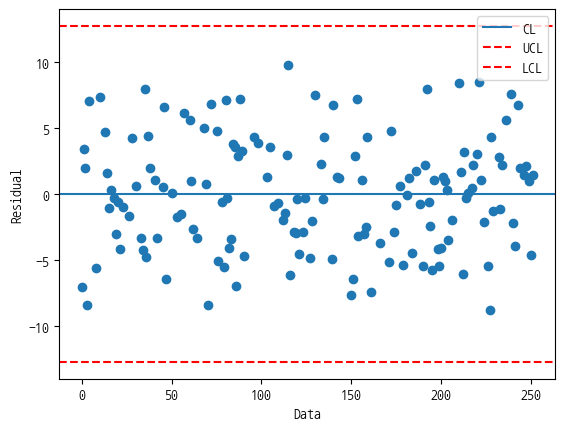

In [31]:
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-",label="CL")
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label="UCL")
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label="LCL")
plt.legend()

잔차가 0을 기준으로 관리상하한을 벗어나지 않고, random하게 산포되어 있으므로 독립성을 만족한다

> 모델의 성능 확인

In [32]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수: ",r2_score(df_train["FAT"],train_pred))
print("test data의 결정계수: ",r2_score(df_test["FAT"],test_pred))

train data의 결정계수:  0.7404267053771911
test data의 결정계수:  0.6860604920174335


train data의 결정계수는 74.0%

test data의 결정계수는 68.6%

> 모델의 성능

In [36]:
#RFE 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
#목표변수, 설명변수 분리
df_train_y = df_train["FAT"]
df_train_x = df_train.drop("FAT",axis=1)

# sklearn의 선형회귀 모델
model = LinearRegression()

# 전체 변수 중 5개가 남을 때까지 선택
rfe = RFE(estimator= model, n_features_to_select=5).fit(df_train_x,df_train_y)

# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols))
print("removed Variables : {}".format(removed_cols))

Selected Variables : Index(['NECK', 'ABDOMEN', 'HIP', 'FOREARM', 'WRIST'], dtype='object')
removed Variables : Index(['AGE', 'CHEST', 'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'GENDER_여성', 'BMI'], dtype='object')


> 후진제거법을 이용한 변수 선택 및 모델 생성

In [37]:
# 회귀 모델 생성
reg_model = smf.ols(formula='FAT ~ NECK + ABDOMEN + HIP + FOREARM + WRIST', data=df_train)

#적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     82.76
Date:                Mon, 15 May 2023   Prob (F-statistic):           1.02e-40
Time:                        17:33:34   Log-Likelihood:                -432.50
No. Observations:                 151   AIC:                             877.0
Df Residuals:                     145   BIC:                             895.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1753      7.621     -0.417      0.6

1. No. observations :151 / Df Residuals(잔차 자유도) :145 / Df Model(모델 자유도) : 5

2. 분산분석결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 적합

3. 설명력 : Adj. R-squared = 0.732 이므로 이 모델을 통해서 y를 73%만큼 설명할 수 있다.

4. 회귀계수 검정 : 절편을 제외하고, WRIST는 p값이 0.05보다 크므로 유의하지 않음

수작업으로 선택한 변수 : NECK, ABDOMEN, HIP, FOREARM, BMI
수작업으로 선택한 변수와 다름!


### 4. 결론 도출

* 비표준화 회귀계수 기준, 수작업 모델링 결과 적용

<Axes: >

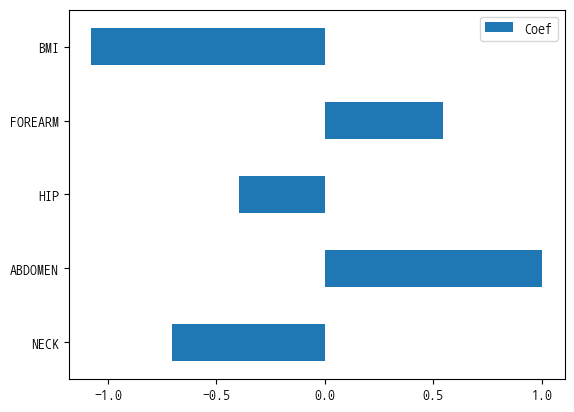

In [38]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},
                          index = ['NECK','ABDOMEN','HIP','FOREARM','BMI'])

df_reg_coef.plot.barh(y = "Coef")

중요도는 회귀계수의 절대값 크기
bmi가 높을수록, abdomen이 높을수록 FAT이 높다